### In this notebook i will do some analysis and simple regression model based on our data which is uber and lyft fare dataset. I got this data from kaggle where the main purpose and objective of this large dataset is to model how price or cab fare varies with all the features that've been given.

# 1. Importing Library and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("/Users/danielbeltsazar/Work/ZebraX/New Dataset/New Dataset/Regression/Uber and Lyft Dataset/uberlyft_price_reg.csv")
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
df['datetime']=pd.to_datetime(df['datetime'])

In [5]:
df.isnull().sum().sum()

0

In [6]:
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [7]:
df['visibility.1'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility.1, dtype: float64

In [8]:
df = df.drop(['visibility.1'],axis=1)

# 2. EDA and Visualization

## 1. Time Analysis 

### --Month Data--

In [9]:
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show(renderer='png')

   month  counts
0     11  263771
1     12  374205


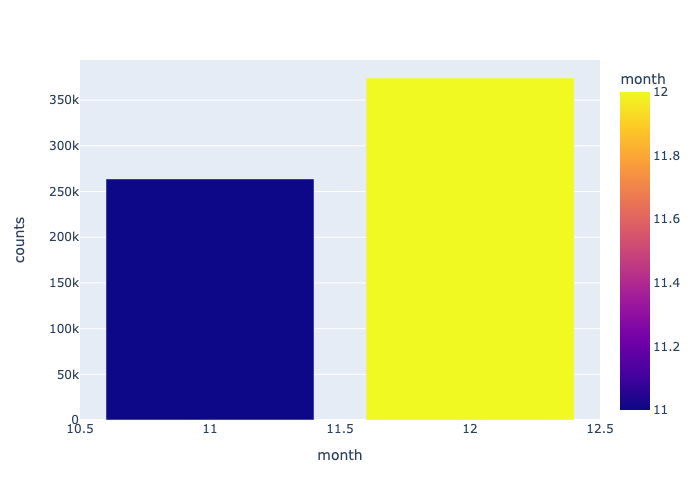

In [10]:
plot_bar('month')

### It appears that we only have november and december in our month data. It means the data is only recorded or taken in november and december with december data dominating.

### --Day Data--

    day  counts
0     1   41680
1     2   41298
2     3   41323
3     4   11627
4     9    1529
5    10    2534
6    13   35496
7    14   41344
8    15   41332
9    16   41359
10   17   41354
11   18   33329
12   26   29028
13   27   70135
14   28   67842
15   29   55222
16   30   41544


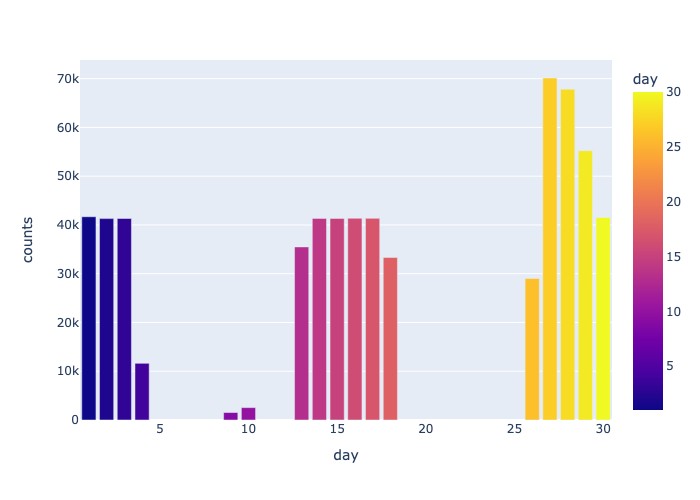

In [11]:
plot_bar('day')

### It seems we have many gaps in our 'day' data. For example we don't have data from 18th day until 25th day in each month.

### --Hour Data--

    hour  counts
0      0   29872
1      1   26310
2      2   26323
3      3   25530
4      4   26125
5      5   22995
6      6   25147
7      7   22930
8      8   22337
9      9   26673
10    10   27918
11    11   27946
12    12   28017
13    13   27977
14    14   27976
15    15   27868
16    16   27972
17    17   28075
18    18   27958
19    19   25410
20    20   24620
21    21   25549
22    22   27093
23    23   29355


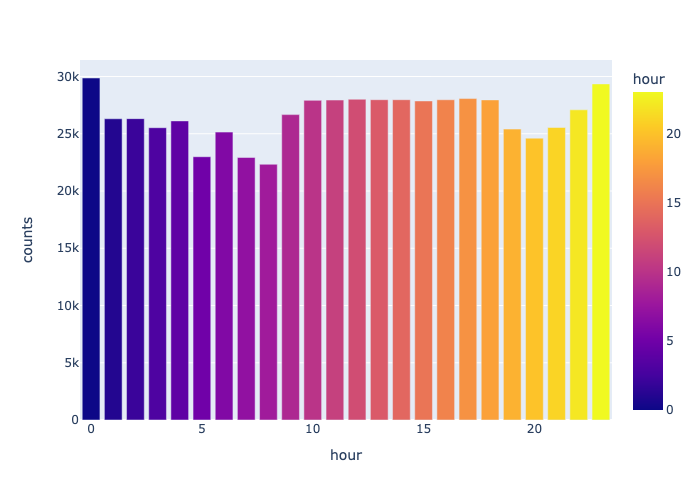

In [12]:
plot_bar('hour')

### It seems we have almost 24 hours recorded data

## 2. Source and Destination Analysis

                     source  counts
0                  Back Bay   53201
1               Beacon Hill   52841
2         Boston University   53172
3                    Fenway   53166
4        Financial District   54197
5          Haymarket Square   53147
6                 North End   53171
7             North Station   52576
8   Northeastern University   53164
9             South Station   53160
10         Theatre District   53201
11                 West End   52980


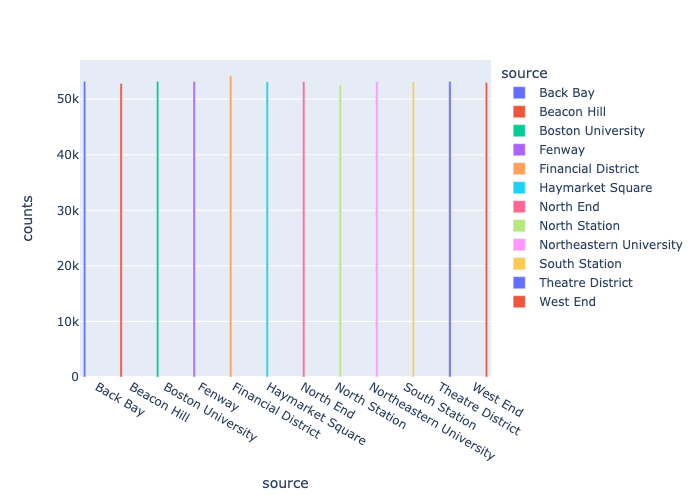

In [13]:
plot_bar('source')

### It seems that all sources are almost equal in number. There are about 50k data in each source feature (Back Bay, Beacon Hill, Boston University, etc)

                destination  counts
0                  Back Bay   53190
1               Beacon Hill   52840
2         Boston University   53171
3                    Fenway   53166
4        Financial District   54192
5          Haymarket Square   53171
6                 North End   53164
7             North Station   52577
8   Northeastern University   53165
9             South Station   53159
10         Theatre District   53189
11                 West End   52992


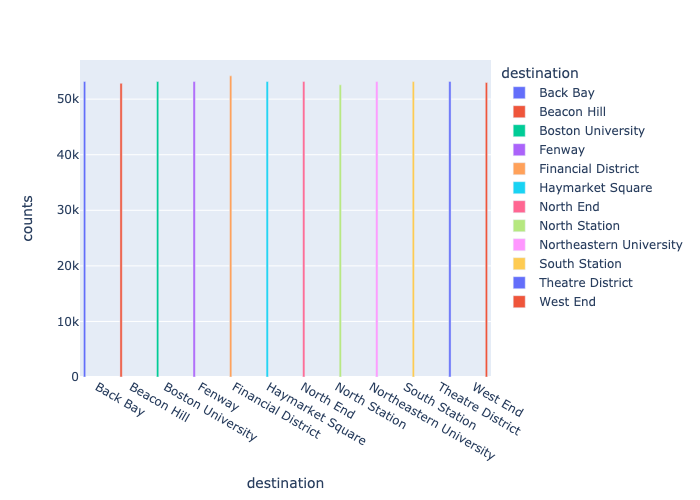

In [14]:
plot_bar('destination')

### Same with source feature, there are about 50k data in each destination feature (Back Bay, Beacon Hill, Boston University, etc)

In [15]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination source                                       
Back Bay    Boston University        42.336960 -71.066178
            Fenway                   42.337740 -71.065822
            Haymarket Square         42.337087 -71.065110
            North End                42.338100 -71.066343
            Northeastern University  42.336668 -71.065314
...                                        ...        ...
West End    Fenway                   42.338291 -71.066356
            Haymarket Square         42.339314 -71.066239
            North End                42.337212 -71.066268
            Northeastern University  42.340015 -71.066646
            South Station            42.338983 -71.066967

[72 rows x 2 columns]

### Here i attached the example image of the map plot of one of the cab trip routes. I can't render it here because it won't be available to see in github. For a complete visualization you can see my notebook that includes all the maps in my Geospatial Project repository

In [16]:
# import geopandas as gpd
# import folium
# df1 = df[df['source']=='Haymarket Square']
# my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
# my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
# my_map

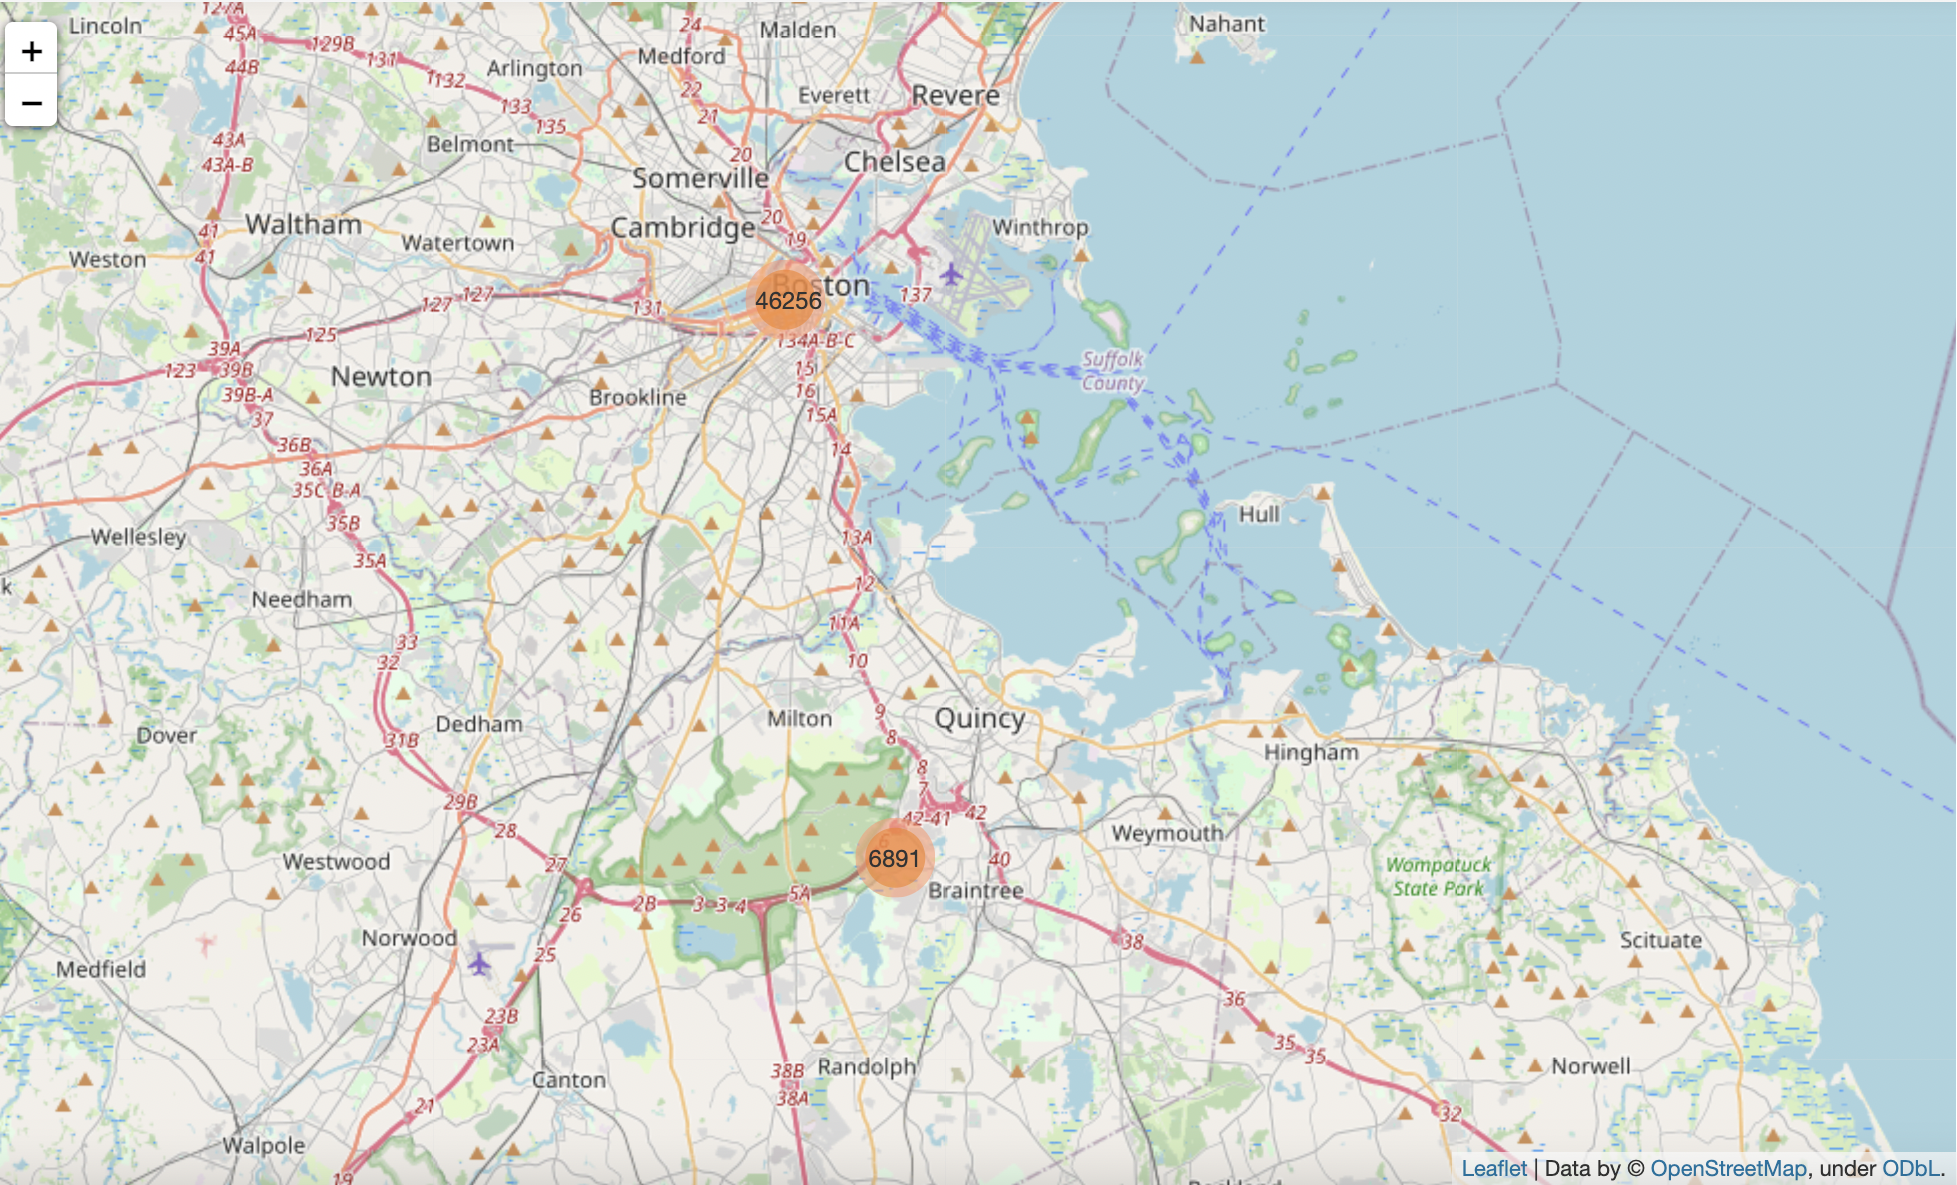

### We can see that trips which their sources are Haymarket Square have two groups or clusters of destination that contain many places (we can see them if we zoom the map). Many of them are in boston area as we can see that there are 46256 data in that cluster.

## 3. Cab Type Analysis

  cab_type  counts
0     Lyft  307408
1     Uber  330568


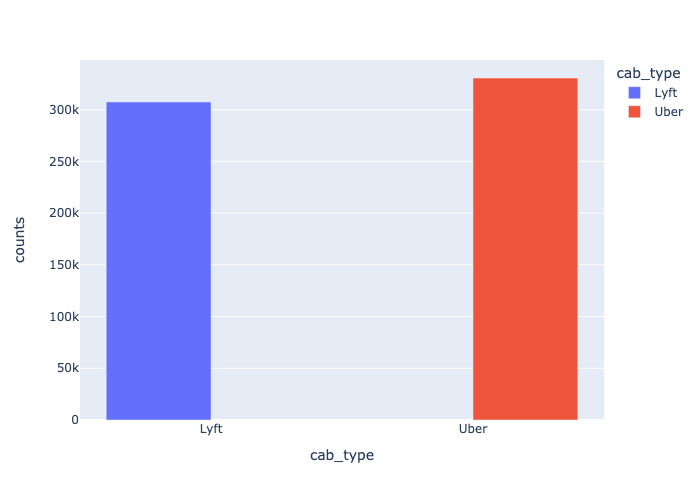

In [17]:
plot_bar('cab_type')

### So for our whole data, we have uber data more than lyft data. The difference is not too big, each cab type has about 300K data.

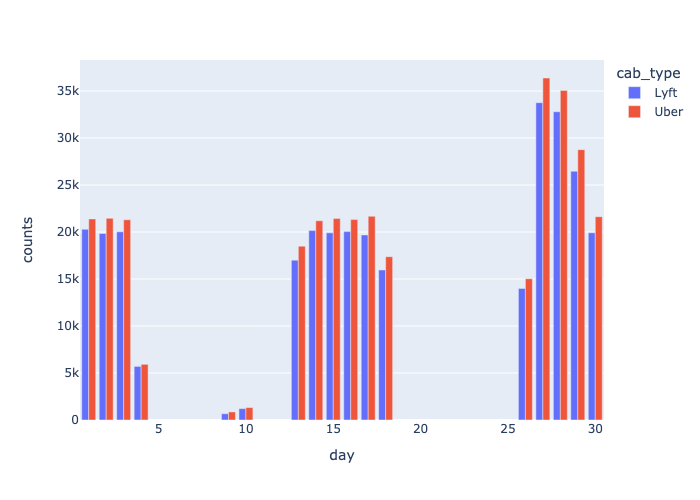

In [18]:
df2 =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="day", y="counts", color="cab_type", barmode="group")
fig2.show(renderer='png')

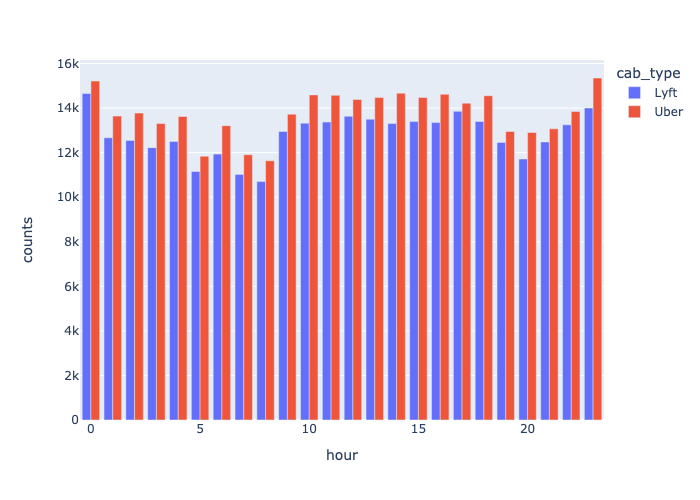

In [19]:
df3 =df.groupby(["hour","cab_type"]).size().reset_index(name="counts")
fig3 = px.bar(data_frame=df3, x="hour", y="counts", color="cab_type", barmode="group")
fig3.show(renderer='png')

### So in every day and every hour recorded, uber seems dominating booking order in our data

## 4. Price Analysis

### We can see average or mean of our price data in every route (source-destination) through table below

In [20]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

### And we can see our maximum price data

In [21]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 97.5


id     timestamp  hour  day  month  \
549671  ba1593a1-e4fd-4c7a-a011-e2d4fccbf081  1.543714e+09     1    2     12   

                  datetime          timezone              source destination  \
549671 2018-12-02 01:28:02  America/New_York  Financial District      Fenway   

       cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
549671     Lyft  ...                0.0  1543683600           31.57   

        temperatureMinTime  temperatureMax  temperatureMaxTime  \
549671          1543665600           44.65          1543690800   

        apparentTemperatureMin  apparentTemperatureMinTime  \
549671                    28.1                  1543658400   

        apparentTemperatureMax apparentTemperatureMaxTime  
549671                   43.98                 1543690800  

[1 rows x 56 columns]

In [22]:
df[df['price']==df.price.max()][['latitude','longitude']]

latitude  longitude
549671   42.3503    -71.081

### I can plot the map of both places using folium to see how far they are from each other (I only inserted the snapshot of the plot)

In [23]:
# Using this code:
# map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)
# folium.Marker(location=(42.3503,-71.081)).add_to(map1) # Fenway
# folium.Marker(location=(42.3378,-71.066)).add_to(map1) # Financial District
# display(map1)

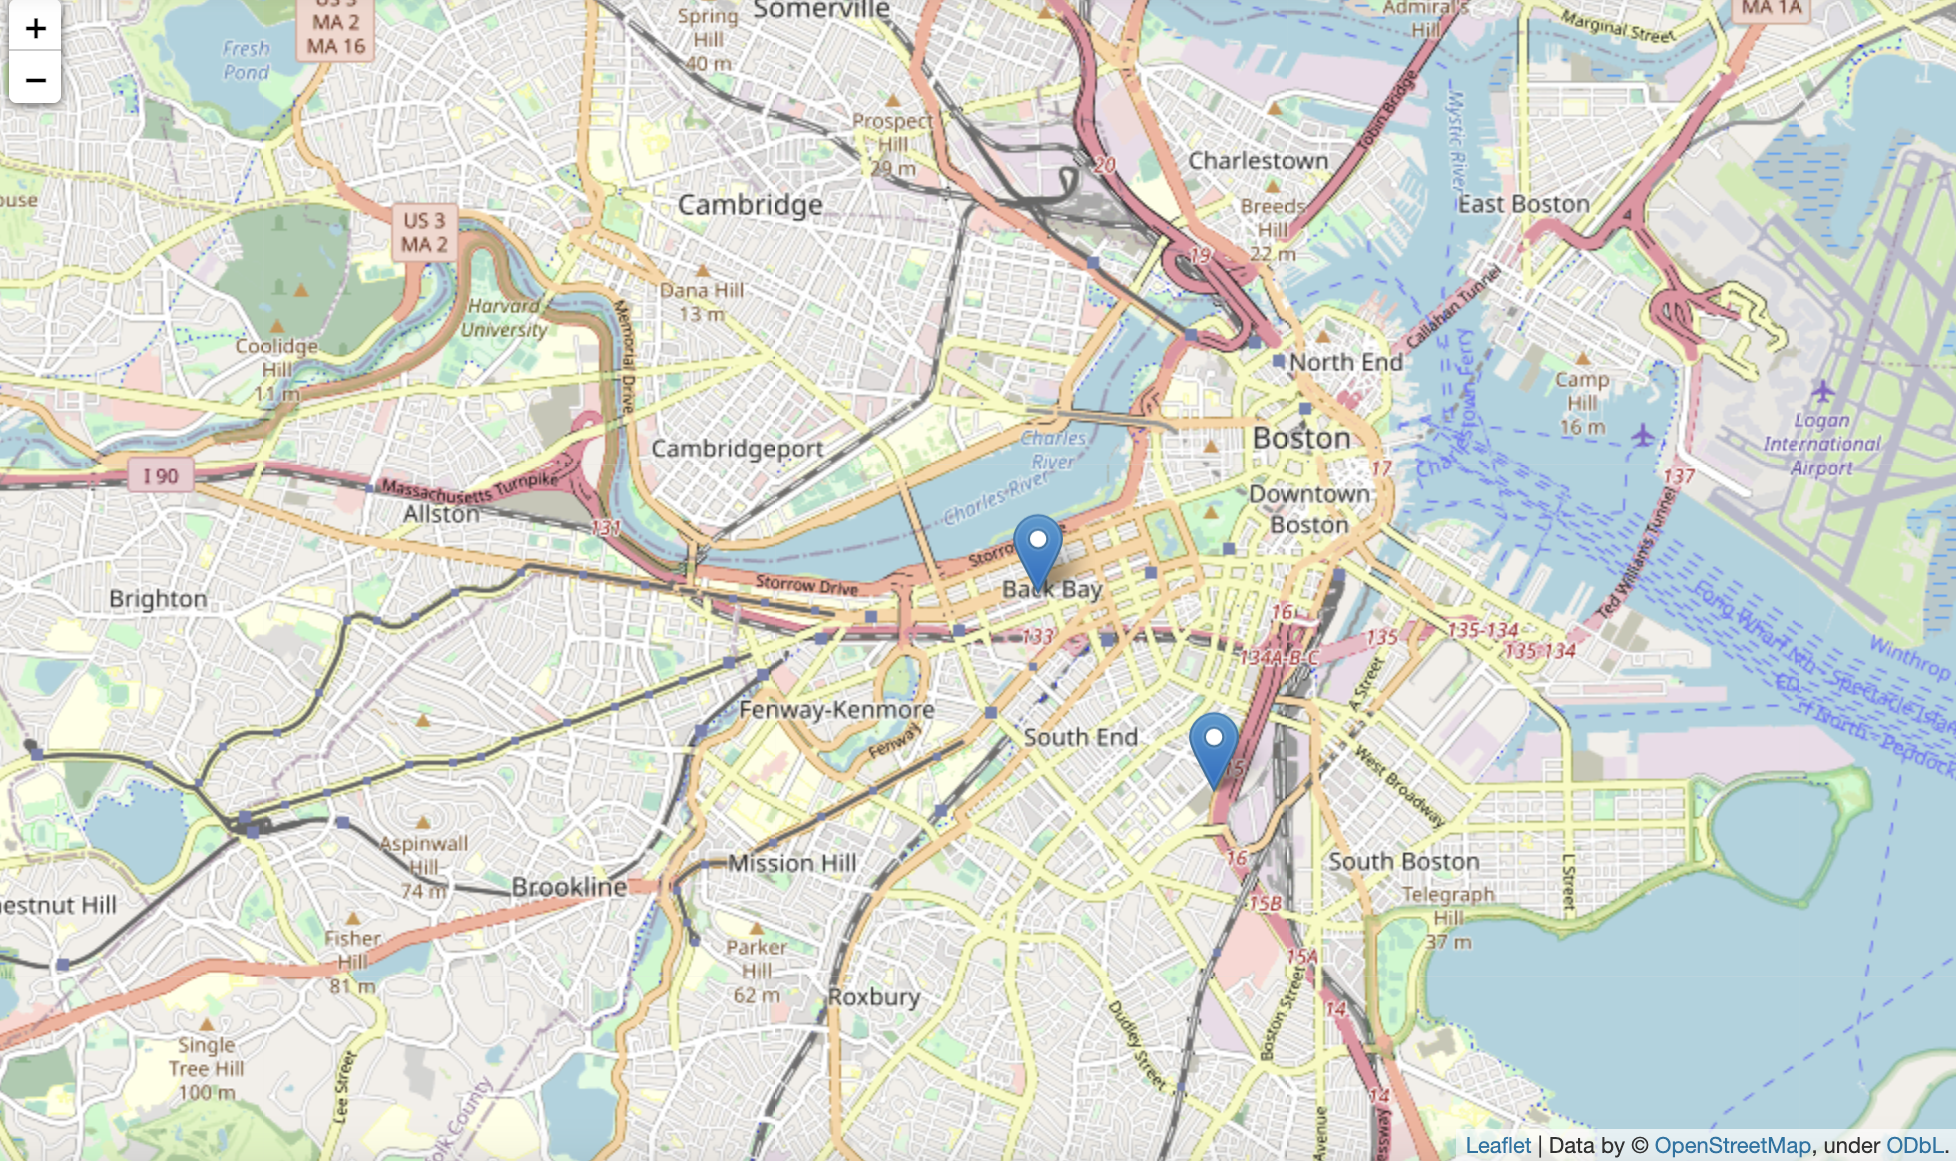

### Apparently the 'Financial District - Fenway' route (by lyft) costs 97.5 dollars, which is our maximum price data. But from the map above, the distance between both places is not too far (they are both in boston), so it could be outlier since we don't have information about trip duration or transit. We should check another data with the same route

In [24]:
df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()
df_group[(df_group['source']=='Financial District')& (df_group['destination']=='Fenway')]

source destination      mean
25  Financial District      Fenway  23.40485

### The mean of the price data of that route is 23.4 dollars, which is far from our maximum price data (97.5 dollars). Then it is possible an outlier. We can drop it.

In [25]:
df = df.loc[df['price']!=df.price.max()]

# 3. Data Preprocessing / Feature Engineering

## 1. Removing Unnecessary Features

In [26]:
# For further modelling i don't think we need date related features. But maybe we need them in the future analysis.
# so i will make new dataframe

new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [27]:
new_df.shape

(637975, 41)

### Our goal is to make linear regression model. First we check correlation between our features and target feature (price)

### First, i want to check the correlation of our temperature related features with our target feature (Price)

In [28]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [29]:
df_temp = new_df[temp_cols]
df_temp.head()

temperature  apparentTemperature  temperatureHigh  temperatureLow  \
0        42.34                37.12            43.68           34.19   
1        43.58                37.35            47.30           42.10   
2        38.33                32.93            47.55           33.10   
3        34.38                29.63            45.03           28.90   
4        37.44                30.88            42.18           36.71   

   apparentTemperatureHigh  apparentTemperatureLow  temperatureMin  \
0                    37.95                   27.39           39.89   
1                    43.92                   36.20           40.49   
2                    44.12                   29.11           35.36   
3                    38.53                   26.20           34.67   
4                    35.75                   30.29           33.10   

   temperatureHighTime  temperatureMax  apparentTemperatureMin  \
0           1544968800           43.68                   33.73   
1           1543251600           47.30                   36.20   
2           1543320000           47.55                   31.04   
3           1543510800           45.03                   30.30   
4           1543420800           42.18                   29.11   

   apparentTemperatureMax  price  
0                   38.07    5.0  
1                   43.92   11.0  
2                   44.12    7.0  
3                   38.53   26.0  
4                   35.75    9.0

<AxesSubplot:>

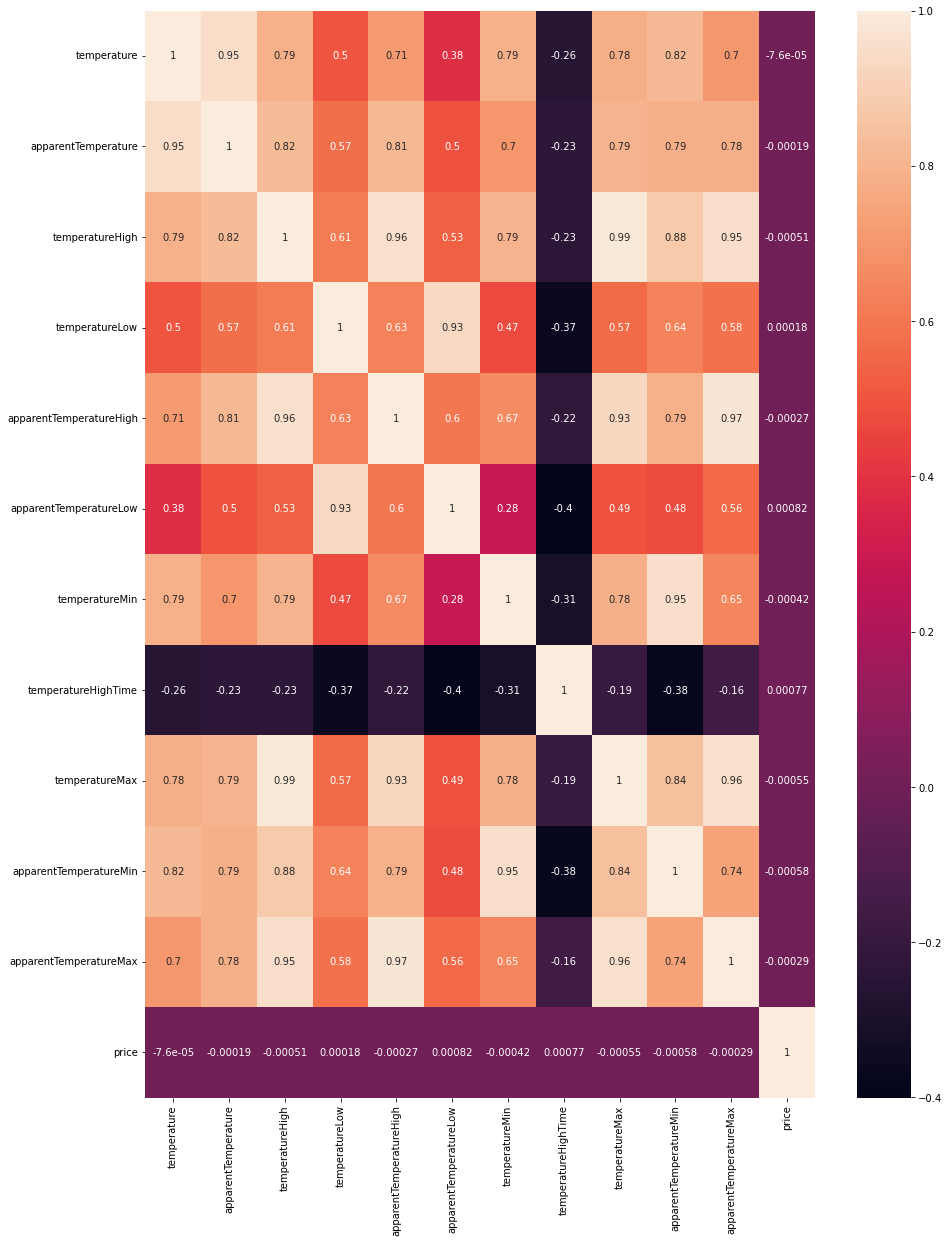

In [30]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

### We see that all temperature related features have weak correlation with our target feature which is price

### Removing all of them will not make any impact to our regression model

In [31]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape

(637975, 30)

### Second, i want to check the correlation of our cilmate related features with our target feature (Price)

In [32]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_df[climate_column]
df_clim.head()

precipIntensity  precipProbability  humidity  windSpeed  windGust  \
0           0.0000                0.0      0.68       8.66      9.17   
1           0.1299                1.0      0.94      11.98     11.98   
2           0.0000                0.0      0.75       7.33      7.33   
3           0.0000                0.0      0.73       5.28      5.28   
4           0.0000                0.0      0.70       9.14      9.14   

   visibility  dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  \
0      10.000     32.70   1021.98           57        0.72        0  303.8   
1       4.786     41.83   1003.97           90        1.00        0  291.1   
2      10.000     31.10    992.28          240        0.03        0  315.7   
3      10.000     26.64   1013.73          310        0.00        0  291.1   
4      10.000     28.61    998.36          303        0.44        0  347.7   

   moonPhase  precipIntensityMax  price  
0       0.30              0.1276    5.0  
1       0.64              0.1300   11.0  
2       0.68              0.1064    7.0  
3       0.75              0.0000   26.0  
4       0.72              0.0001    9.0

<AxesSubplot:>

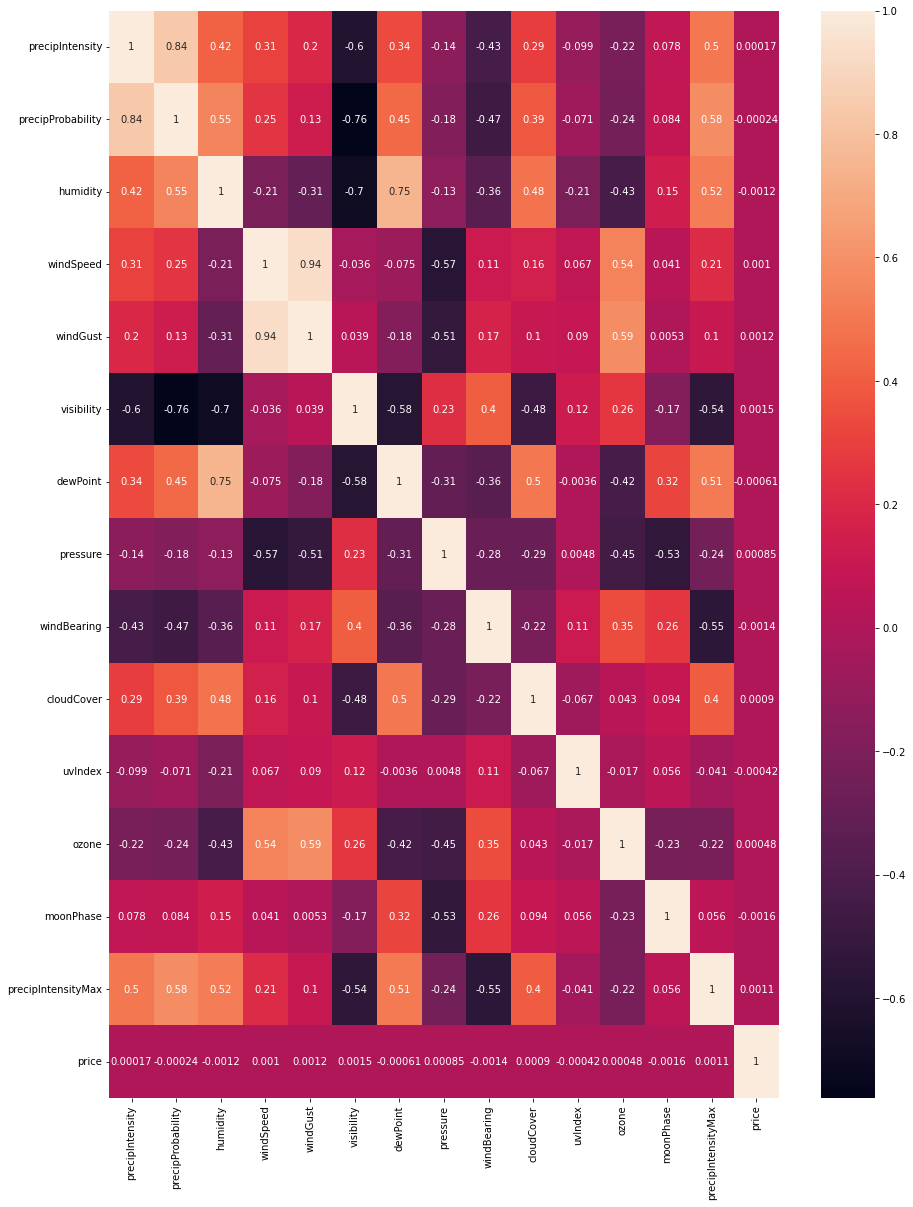

In [33]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

### Apparently all climate related features also have weak correlation with our target feature which is price

### Once again, removing all of them will not make any impact to our regression model

In [34]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape

(637975, 16)

### Third, i want to check our categorical value in our dataset features 

In [35]:
category_col = new_df.select_dtypes(include=['object','category']).columns.tolist()
for column in new_df[category_col]:
    print(f'{column} : {new_df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

### We can see that 'timezone' feature has only 1 value and 'product_id' feature contains many unidentified values. So we can remove or drop them.

In [36]:
new_df = new_df.drop(['timezone','product_id'],axis=1)

In [37]:
new_df.shape

(637975, 14)

### Fourth, i want to check the correlation of our categorical features with our target feature (price)

In [38]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

source    destination cab_type          name    short_summary  \
0  Haymarket Square  North Station     Lyft        Shared   Mostly Cloudy    
1  Haymarket Square  North Station     Lyft           Lux            Rain    
2  Haymarket Square  North Station     Lyft          Lyft           Clear    
3  Haymarket Square  North Station     Lyft  Lux Black XL           Clear    
4  Haymarket Square  North Station     Lyft       Lyft XL   Partly Cloudy    

                    icon  price  
0   partly-cloudy-night     5.0  
1                  rain    11.0  
2           clear-night     7.0  
3           clear-night    26.0  
4   partly-cloudy-night     9.0

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [40]:
df_cat_encode

source  destination  cab_type  name  short_summary  icon  price
0            5            7         0     7              4     5    5.0
1            5            7         0     2              8     6   11.0
2            5            7         0     5              0     1    7.0
3            5            7         0     4              0     1   26.0
4            5            7         0     6              6     5    9.0
...        ...          ...       ...   ...            ...   ...    ...
637971      11            6         1    11              6     5    9.5
637972      11            6         1    10              6     5   13.0
637973      11            6         1     9              6     5    9.5
637974      11            6         1     1              6     5   27.0
637975      11            6         1     8              6     5   10.0

[637975 rows x 7 columns]

<AxesSubplot:>

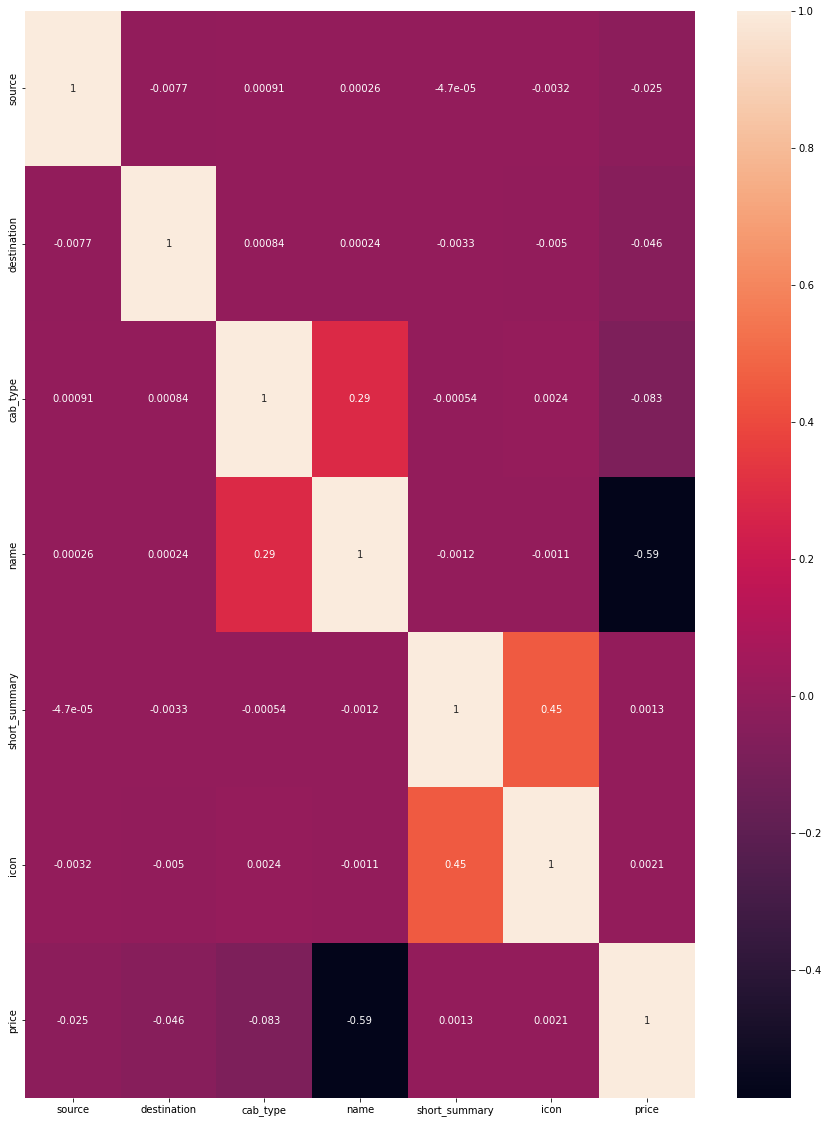

In [41]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

### We can see only name feature that has a relatively strong correlation. Source,destination, and cab_type features have relatively weak correlation, but i will pick cab_type feature because it has stronger correlation than other two features. I will drop or remove the rest of the columns

In [42]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

hour  day  month cab_type          name  price  distance  surge_multiplier  \
0     9   16     12     Lyft        Shared    5.0      0.44               1.0   
1     2   27     11     Lyft           Lux   11.0      0.44               1.0   
2     1   28     11     Lyft          Lyft    7.0      0.44               1.0   
3     4   30     11     Lyft  Lux Black XL   26.0      0.44               1.0   
4     3   29     11     Lyft       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  
0   42.2148    -71.033  
1   42.2148    -71.033  
2   42.2148    -71.033  
3   42.2148    -71.033  
4   42.2148    -71.033

### Also i will remove hour, day, month, latitude, longitude, because we won't need them for now

In [43]:
new_df = new_df.drop(['hour','day','month','latitude','longitude'],axis=1)
new_df.head()

cab_type          name  price  distance  surge_multiplier
0     Lyft        Shared    5.0      0.44               1.0
1     Lyft           Lux   11.0      0.44               1.0
2     Lyft          Lyft    7.0      0.44               1.0
3     Lyft  Lux Black XL   26.0      0.44               1.0
4     Lyft       Lyft XL    9.0      0.44               1.0

In [44]:
new_df.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

## 2. Removing Outliers

### We've already done this before but only to one instance which has maximum price value. We want to check another possible outlier.

### We're using IQR method for checking top and bottom outliers

In [45]:
Qp12 = new_df['price'].quantile(0.25)
Qp32 = new_df['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [46]:
new_df[new_df['price']>(Qp32+(1.5*IQRp))]

cab_type          name  price  distance  surge_multiplier
645        Lyft     Lux Black   52.5      3.25              2.00
646        Lyft  Lux Black XL   67.5      3.25              2.00
706        Lyft  Lux Black XL   45.5      4.76              1.00
1005       Lyft  Lux Black XL   45.5      4.31              1.00
1210       Lyft  Lux Black XL   45.5      5.33              1.00
...         ...           ...    ...       ...               ...
637394     Uber     Black SUV   47.0      5.56              1.00
637637     Lyft  Lux Black XL   52.5      4.58              1.25
637813     Lyft  Lux Black XL   47.5      5.42              1.00
637878     Uber     Black SUV   51.0      7.36              1.00
637917     Uber     Black SUV   49.5      7.36              1.00

[5588 rows x 5 columns]

In [47]:
new_df[new_df['price']<(Qp12-(1.5*IQRp))]

Empty DataFrame
Columns: [cab_type, name, price, distance, surge_multiplier]
Index: []

### We can see that we have 5588 data outliers. We can remove or drop them.

In [48]:
print('Size before removing :',new_df.shape)
new_df= new_df[~((new_df['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',new_df.shape)

Size before removing : (637975, 5)
Size after removing : (632387, 5)


# 4. Regression Model

## 1. Encoding Data (One Hot Encoding)

In [49]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [50]:
new_df_onehot=new_df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)
    
new_df_onehot.head()

price  distance  surge_multiplier  cab_type_Lyft  cab_type_Uber  \
0    5.0      0.44               1.0              1              0   
1   11.0      0.44               1.0              1              0   
2    7.0      0.44               1.0              1              0   
3   26.0      0.44               1.0              1              0   
4    9.0      0.44               1.0              1              0   

   name_Black  name_Black SUV  name_Lux  name_Lux Black  name_Lux Black XL  \
0           0               0         0               0                  0   
1           0               0         1               0                  0   
2           0               0         0               0                  0   
3           0               0         0               0                  1   
4           0               0         0               0                  0   

   name_Lyft  name_Lyft XL  name_Shared  name_UberPool  name_UberX  \
0          0             0            1              0           0   
1          0             0            0              0           0   
2          1             0            0              0           0   
3          0             0            0              0           0   
4          0             1            0              0           0   

   name_UberXL  name_WAV  
0            0         0  
1            0         0  
2            0         0  
3            0         0  
4            0         0

## 2. Dataset Split

In [51]:
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3. Modeling

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [53]:
# Fit to data training
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.933778878938614

In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

5.108385125943477
2.2601736937553003


### Then for the long journey we have been done, we got our regression model with accuracy or score 93.37% and RMSE value 2.26. It's not the best score though, we still can improve it with other regression models which could give better results.